In [1]:
import pandas as pd
import pyarrow
import requests
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import numpy as np

# taxi+_zone_lookup

Zonas y tipos de servicios de NYC

In [2]:
tzl = pd.read_csv("DATA/taxi+_zone_lookup.csv")

tzl.head(3)

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone


In [3]:
tzl["LocationID"]

0        1
1        2
2        3
3        4
4        5
      ... 
260    261
261    262
262    263
263    264
264    265
Name: LocationID, Length: 265, dtype: int64

In [4]:
tzl["service_zone"].unique()

array(['EWR', 'Boro Zone', 'Yellow Zone', 'Airports', nan], dtype=object)

In [5]:
tzl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LocationID    265 non-null    int64 
 1   Borough       265 non-null    object
 2   Zone          264 non-null    object
 3   service_zone  263 non-null    object
dtypes: int64(1), object(3)
memory usage: 8.4+ KB


In [6]:
zonas_manh = tzl["LocationID"][tzl["Borough"] == "Manhattan"]
zonas_manh

3        4
11      12
12      13
23      24
40      41
      ... 
245    246
248    249
260    261
261    262
262    263
Name: LocationID, Length: 69, dtype: int64

Nos quedamos con los LocationID que son dentro de Manhattan.

# yellow taxis trip records 2023-01

ID del vehículo, fecha y hora de subida y de bajada, número de pasajeros, distancia en millas, ID del tipo de viaje, ID zona subida y bajada, tipo de pago, monto del viaje, extra del viaje (espera, quizá), impuesto, propina, peaje, sobrecargo por mejora, monto total, sobrecargo por congestión, tarifa por aeropuerto.

In [7]:
yellow22 = pd.read_parquet("DATA/apis/yellow_tripdata_2023-01.parquet")

yellow22

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.30,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.90,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.90,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.10,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.40,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066761,2,2023-01-31 23:58:34,2023-02-01 00:12:33,NaN,3.05,NaN,None,107,48,0,15.80,0.00,0.5,3.96,0.0,1.0,23.76,NaN,NaN
3066762,2,2023-01-31 23:31:09,2023-01-31 23:50:36,NaN,5.80,NaN,None,112,75,0,22.43,0.00,0.5,2.64,0.0,1.0,29.07,NaN,NaN
3066763,2,2023-01-31 23:01:05,2023-01-31 23:25:36,NaN,4.67,NaN,None,114,239,0,17.61,0.00,0.5,5.32,0.0,1.0,26.93,NaN,NaN
3066764,2,2023-01-31 23:40:00,2023-01-31 23:53:00,NaN,3.15,NaN,None,230,79,0,18.15,0.00,0.5,4.43,0.0,1.0,26.58,NaN,NaN


In [8]:
yellow22.describe().round(2)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,3066766.00,3066766,3066766,2995023.00,3066766.00,2995023.00,3066766.00,3066766.00,3066766.00,3066766.00,3066766.00,3066766.00,3066766.00,3066766.00,3066766.00,3066766.00,2995023.00,2995023.00
mean,1.73,2023-01-17 00:22:26.288164,2023-01-17 00:38:06.427874,1.36,3.85,1.50,166.40,164.39,1.19,18.37,1.54,0.49,3.37,0.52,0.98,27.02,2.27,0.11
min,1.00,2008-12-31 23:01:42,2009-01-01 14:29:11,0.00,0.00,1.00,1.00,1.00,0.00,-900.00,-7.50,-0.50,-96.22,-65.00,-1.00,-751.00,-2.50,-1.25
25%,1.00,2023-01-09 16:21:57.250000,2023-01-09 16:37:06,1.00,1.06,1.00,132.00,114.00,1.00,8.60,0.00,0.50,1.00,0.00,1.00,15.40,2.50,0.00
50%,2.00,2023-01-17 08:42:29.500000,2023-01-17 08:58:30.500000,1.00,1.80,1.00,162.00,162.00,1.00,12.80,1.00,0.50,2.72,0.00,1.00,20.16,2.50,0.00
75%,2.00,2023-01-24 16:26:27,2023-01-24 16:42:49,1.00,3.33,1.00,234.00,234.00,1.00,20.50,2.50,0.50,4.20,0.00,1.00,28.70,2.50,0.00
max,2.00,2023-02-01 00:56:53,2023-02-02 09:28:47,9.00,258928.15,99.00,265.00,265.00,4.00,1160.10,12.50,53.16,380.80,196.99,1.00,1169.40,2.50,1.25
std,0.44,NaN,NaN,0.90,249.58,6.47,64.24,69.94,0.53,17.81,1.79,0.10,3.83,2.02,0.18,22.16,0.77,0.36


Encontramos dos datos outliers a simple vista, en la columna trip_distance y total_amount.

In [9]:
yellow22.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [10]:
# Calcula el rango intercuartílico (IQR) de la columna "total_fare"
Q1 = yellow22['total_amount'].quantile(0.25)
Q3 = yellow22['total_amount'].quantile(0.75)
IQR = Q3 - Q1

# Define los límites para identificar los outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtra el DataFrame para eliminar los outliers de la columna "total_fare"
yellow22 = yellow22[(yellow22['total_amount'] >= limite_inferior) & (yellow22['total_amount'] <= limite_superior)]
yellow22 = yellow22[yellow22["total_amount"] > 0]

Eliminamos los outliers de total_amount.

In [11]:
# Calcula el rango intercuartílico (IQR) de la columna "total_fare"
Q1 = yellow22['trip_distance'].quantile(0.25)
Q3 = yellow22['trip_distance'].quantile(0.75)
IQR = Q3 - Q1

# Define los límites para identificar los outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtra el DataFrame para eliminar los outliers de la columna "total_fare"
yellow22 = yellow22[(yellow22['trip_distance'] >= limite_inferior) & (yellow22['trip_distance'] <= limite_superior)]

Eliminamos los outliers de trip_distance.

In [12]:
yellow22.shape

(2523382, 19)

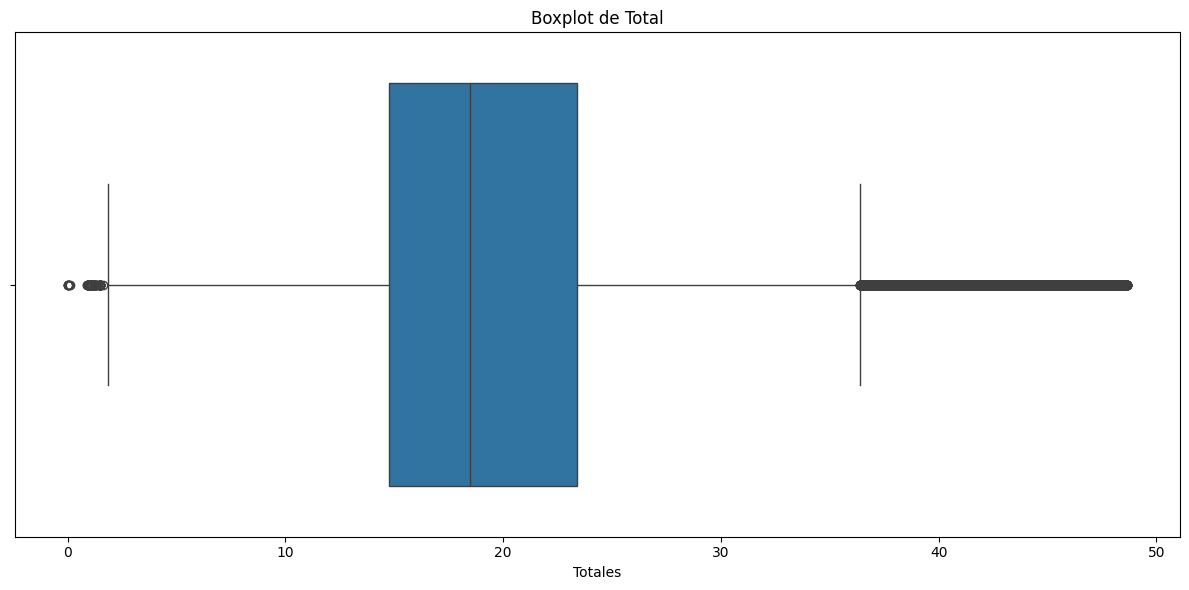

In [13]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.boxplot(x=yellow22['total_amount'], ax=ax)
ax.set_title('Boxplot de Total') ; ax.set_xlabel('Totales')

plt.tight_layout()
plt.show()

Podemos observar que la media del total es 19 aprox y los valores comunmente se distribuyen entre los 15 y 24.

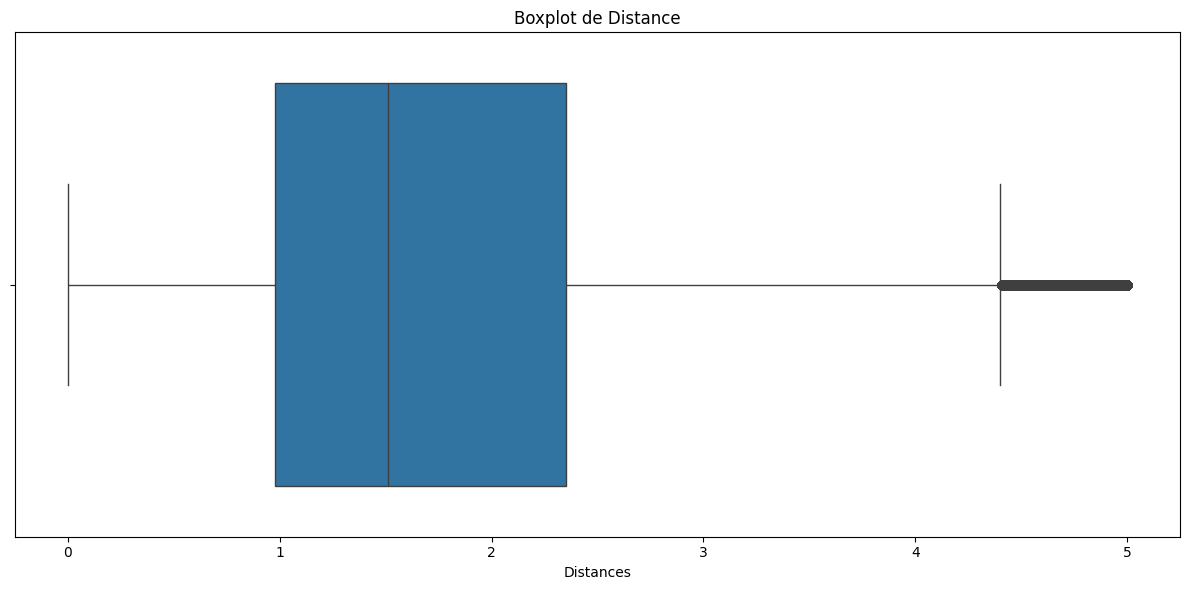

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.boxplot(x=yellow22['trip_distance'], ax=ax)
ax.set_title('Boxplot de Distance') ; ax.set_xlabel('Distances')

plt.tight_layout()
plt.show()

Podemos observar que las distancias van entre 1 milla a 2,3 aproximadamente.

In [15]:
# Convertir las columnas a tipo datetime
yellow22['tpep_dropoff_datetime'] = pd.to_datetime(yellow22['tpep_dropoff_datetime'])
yellow22['tpep_pickup_datetime'] = pd.to_datetime(yellow22['tpep_pickup_datetime'])

# Calcular la diferencia de tiempo en minutos
diferencia_tiempo = (yellow22['tpep_dropoff_datetime'] - yellow22['tpep_pickup_datetime']).dt.total_seconds() / 60

# Agregar la diferencia de tiempo en minutos como una nueva columna
yellow22['diferencia_tiempo'] = diferencia_tiempo.astype(int)


In [16]:
# Calcula el rango intercuartílico (IQR) de la columna "total_fare"
Q1 = yellow22['diferencia_tiempo'].quantile(0.25)
Q3 = yellow22['diferencia_tiempo'].quantile(0.75)
IQR = Q3 - Q1

# Define los límites para identificar los outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtra el DataFrame para eliminar los outliers de la columna "total_fare"
yellow22 = yellow22[(yellow22['diferencia_tiempo'] >= limite_inferior) & (yellow22['diferencia_tiempo'] <= limite_superior)]

#nuevo_dataframe2 = nuevo_dataframe1[nuevo_dataframe1["total_amount"] > 0]

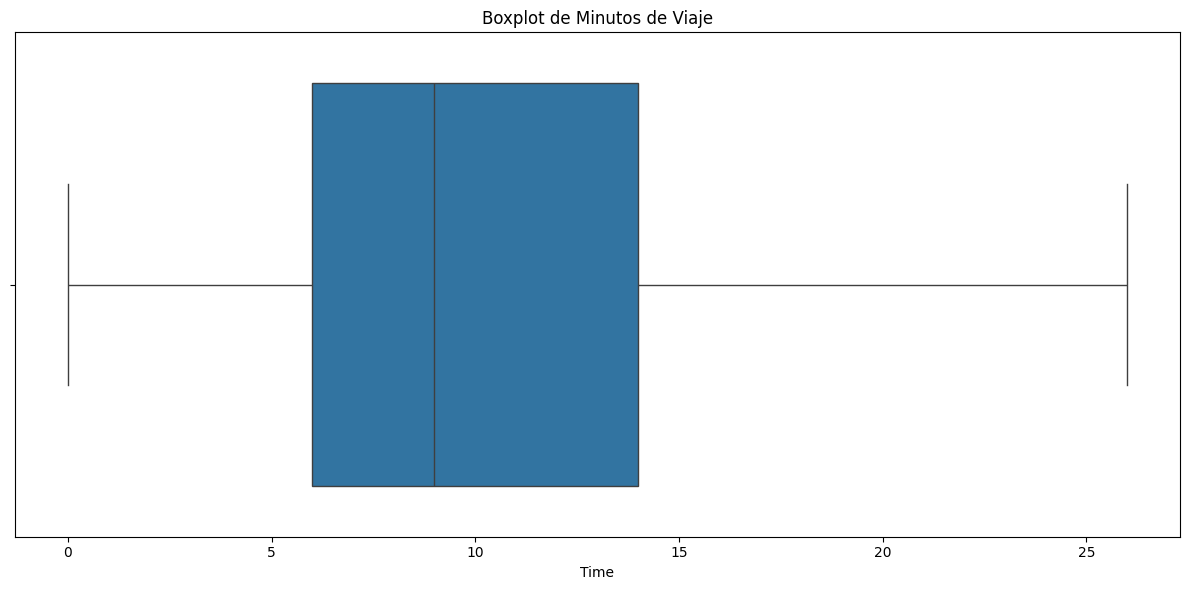

In [17]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.boxplot(x=yellow22['diferencia_tiempo'], ax=ax)
ax.set_title('Boxplot de Minutos de Viaje') ; ax.set_xlabel('Time')

plt.tight_layout()
plt.show()

Los viajes se dan comunmente entre 6 a 14 minutos.

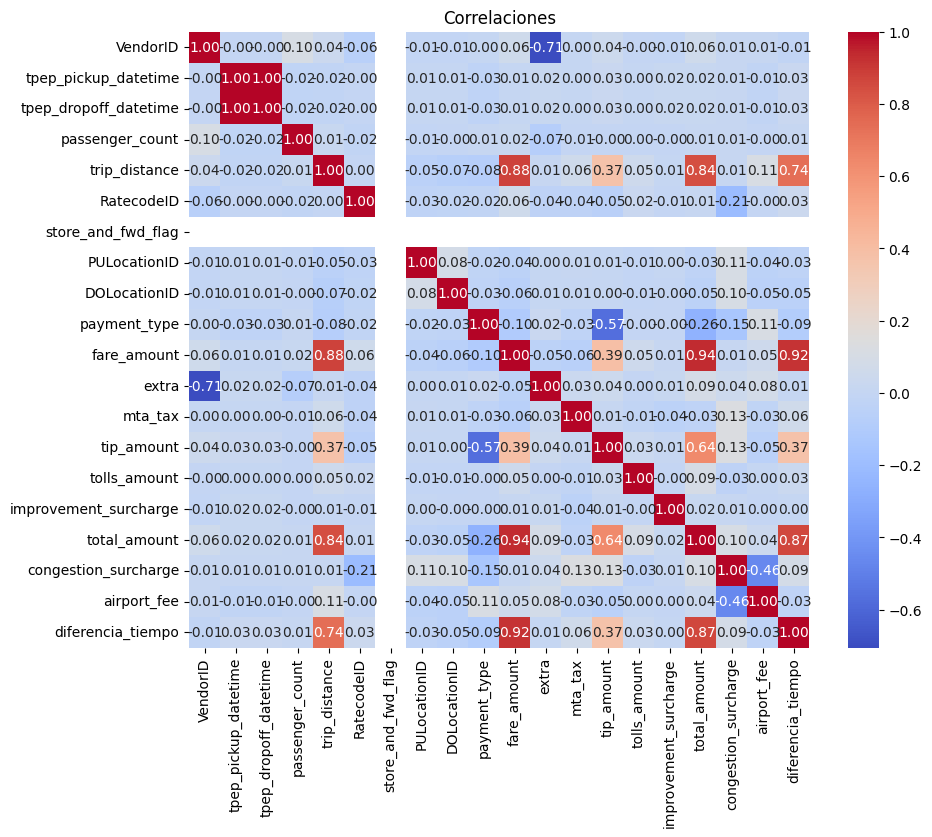

In [18]:
# Filtrar los datos para eliminar las filas que contienen "N" o "Y"
o = yellow22[(yellow22 != "N") & (yellow22 != "Y")]

# Calcular la matriz de correlación
correlacion = o.corr()

# Verificar si la matriz de correlación está vacía después de eliminar NaN
if correlacion.empty:
    print("La matriz de correlación está vacía después de eliminar NaN. Revisa tus datos.")
else:
    # Graficar la matriz de correlación
    plt.figure(figsize=(10, 8))  # Ajustar el tamaño de la figura
    sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlaciones')
    plt.show()


Existe correlatividad entre la distancia de viaje y el total. También hay incidencia entre mayor es el total y/o el tiempo transcurrido mayor es la propina.

In [19]:
yellow22.shape

(2467531, 20)

In [20]:
# Filtrar las filas donde PULocationID o DOLocationID coincidan con los valores en zonas_manh
yellow22_manh = yellow22[yellow22['PULocationID'].isin(zonas_manh) | yellow22['DOLocationID'].isin(zonas_manh)]

yellow22_manh

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,diferencia_tiempo
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.30,1.0,0.5,0.00,0.0,1.0,14.30,2.5,0.0,8
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.90,1.0,0.5,4.00,0.0,1.0,16.90,2.5,0.0,6
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.90,1.0,0.5,15.00,0.0,1.0,34.90,2.5,0.0,12
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.40,1.0,0.5,3.28,0.0,1.0,19.68,2.5,0.0,10
5,2,2023-01-01 00:50:34,2023-01-01 01:02:52,1.0,1.84,1.0,N,161,137,1,12.80,1.0,0.5,10.00,0.0,1.0,27.80,2.5,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066760,2,2023-01-31 23:30:20,2023-01-31 23:34:38,NaN,0.82,NaN,None,231,144,0,15.21,0.0,0.5,3.84,0.0,1.0,23.05,NaN,NaN,4
3066761,2,2023-01-31 23:58:34,2023-02-01 00:12:33,NaN,3.05,NaN,None,107,48,0,15.80,0.0,0.5,3.96,0.0,1.0,23.76,NaN,NaN,13
3066763,2,2023-01-31 23:01:05,2023-01-31 23:25:36,NaN,4.67,NaN,None,114,239,0,17.61,0.0,0.5,5.32,0.0,1.0,26.93,NaN,NaN,24
3066764,2,2023-01-31 23:40:00,2023-01-31 23:53:00,NaN,3.15,NaN,None,230,79,0,18.15,0.0,0.5,4.43,0.0,1.0,26.58,NaN,NaN,13


Filtramos las filas donde el ID de subida y de bajada del pasajero son únicamente en distrito Manhattan.

In [21]:
yellow22_manh.describe().round(2)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,diferencia_tiempo
count,2416368.00,2416368,2416368,2362333.00,2416368.00,2362333.00,2416368.00,2416368.00,2416368.00,2416368.00,2416368.00,2416368.00,2416368.00,2416368.00,2416368.00,2416368.00,2362333.00,2362333.00,2416368.00
mean,1.72,2023-01-17 03:38:36.644584,2023-01-17 03:49:22.604239,1.36,1.73,1.04,170.09,168.30,1.17,12.09,1.38,0.50,2.49,0.01,1.00,19.26,2.45,0.00,10.28
min,1.00,2022-12-31 14:24:54,2022-12-31 14:35:25,0.00,0.00,1.00,4.00,1.00,0.00,-3.00,0.00,-0.50,-5.78,0.00,0.00,1.00,0.00,0.00,0.00
25%,1.00,2023-01-09 19:40:57,2023-01-09 19:50:20,1.00,0.97,1.00,140.00,137.00,1.00,7.90,0.00,0.50,1.00,0.00,1.00,14.70,2.50,0.00,6.00
50%,2.00,2023-01-17 12:16:31,2023-01-17 12:28:44.500000,1.00,1.50,1.00,163.00,163.00,1.00,11.40,1.00,0.50,2.58,0.00,1.00,18.35,2.50,0.00,9.00
75%,2.00,2023-01-24 17:57:30,2023-01-24 18:09:25.250000,1.00,2.28,1.00,236.00,236.00,1.00,14.90,2.50,0.50,3.64,0.00,1.00,23.04,2.50,0.00,14.00
max,2.00,2023-02-01 00:56:53,2023-02-01 01:06:43,6.00,5.00,99.00,265.00,265.00,4.00,52.80,8.75,1.05,43.00,38.75,1.00,48.64,2.50,1.25,26.00
std,0.45,NaN,NaN,0.90,1.01,1.76,64.82,67.56,0.47,4.95,1.46,0.02,1.78,0.26,0.03,6.04,0.34,0.01,5.55


Tenemos un mínimo de pasajeros de 0 y un máximo de 6, con una mediana en 1 y promedio de 1.36.

Las distancias de viaje tienen un mínimo de casi 1 milla, mediana en 1.5 y un máximo de 5 millas, con promedio 1.73.

El precio final del viaje tiene promedio en 19.26, mínimo en 1, mediana en 18.35 y máximo en 48.64.

El tiempo de viaje tiene promedio 10.28 minutos, mínimo 0, mediana de 9 y máximo en 26.

In [22]:
yellow22_manh["payment_type"].mode()

0    1
Name: payment_type, dtype: int64

El método de pago de moda es 1 = Tarjeta de crédito.

In [23]:
# Crear una nueva columna 'hora' que contenga solo la hora
yellow22_manh['hora'] = yellow22_manh['tpep_pickup_datetime'].dt.hour

/var/folders/vk/hsfysc513dd4j0c513j6pl3r0000gn/T/ipykernel_93726/3035191308.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yellow22_manh['hora'] = yellow22_manh['tpep_pickup_datetime'].dt.hour


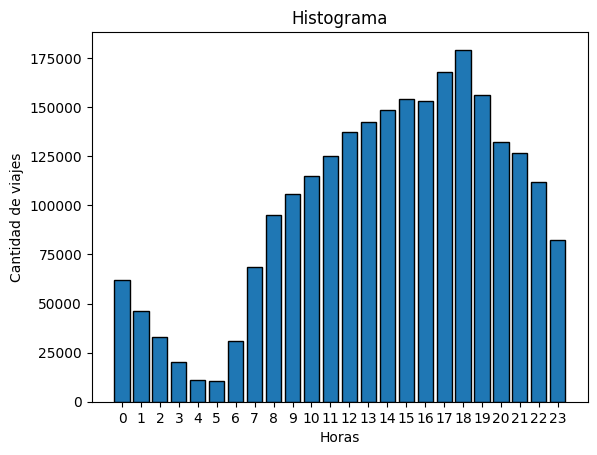

In [24]:
conteo_horas = yellow22_manh['hora'].value_counts()
ax = plt.bar(conteo_horas.index, conteo_horas, edgecolor='black')
plt.xlabel('Horas')
plt.ylabel('Cantidad de viajes')
plt.title('Histograma')
ax = plt.gca()
#ax.set_yticks([0, 5e5, 1e6, 1.5e6, 2e6])
#ax.set_yticklabels(['0', '0.5M', '1M', '1.5M', '2M'])
plt.xticks(range(24), range(24))
plt.show()

La gran mayoría de los viajes comienzan entre las 11 y 19hs para Enero 2023.

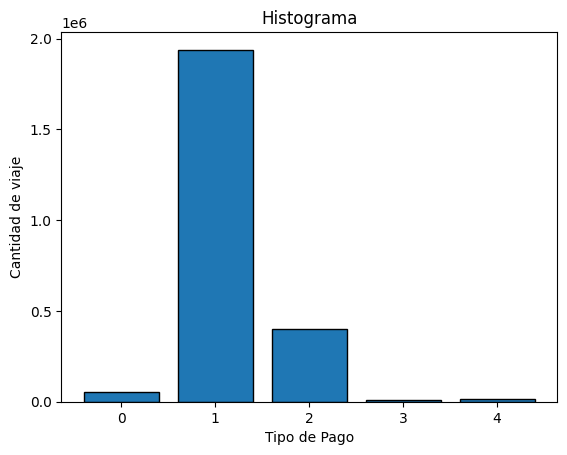

In [25]:
conteo_pagos = yellow22_manh['payment_type'].value_counts()
ax = plt.bar(conteo_pagos.index, conteo_pagos, edgecolor='black')
plt.xlabel('Tipo de Pago')
plt.ylabel('Cantidad de viaje')
plt.title('Histograma')
ax = plt.gca()
ax.set_yticks([0, 500000, 1000000, 1500000, 2000000])
#ax.set_yticklabels(['0', '0.5M', '1M', '1.5M', '2M'])
#plt.xticks(range(6), range(6))
plt.show()

In [26]:
# Convertir la columna 'fecha_hora' a tipo datetime si aún no está en ese formato
yellow22_manh['tpep_pickup_datetime'] = pd.to_datetime(yellow22_manh['tpep_pickup_datetime'])

# Crear una nueva columna 'dia_semana' que contenga el día de la semana en español
yellow22_manh['dia_semana'] = yellow22_manh['tpep_pickup_datetime'].dt.strftime('%A')

/var/folders/vk/hsfysc513dd4j0c513j6pl3r0000gn/T/ipykernel_93726/629692688.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yellow22_manh['tpep_pickup_datetime'] = pd.to_datetime(yellow22_manh['tpep_pickup_datetime'])
/var/folders/vk/hsfysc513dd4j0c513j6pl3r0000gn/T/ipykernel_93726/629692688.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yellow22_manh['dia_semana'] = yellow22_manh['tpep_pickup_datetime'].dt.strftime('%A')


In [27]:
yellow22_manh['dia_semana'].unique()

array(['Sunday', 'Saturday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday'], dtype=object)

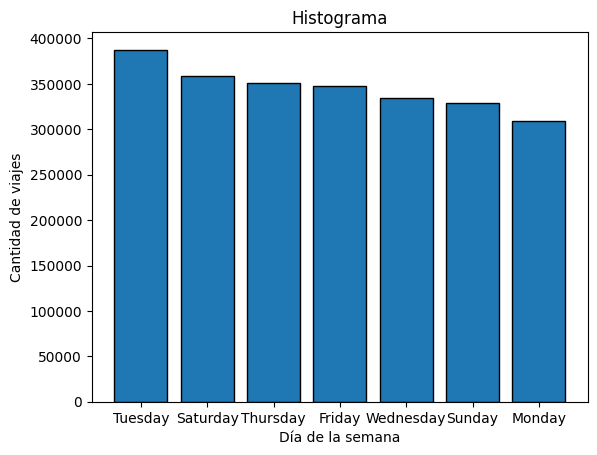

In [28]:
conteo_dias = yellow22_manh['dia_semana'].value_counts()
ax = plt.bar(conteo_dias.index, conteo_dias, edgecolor='black')
plt.xlabel('Día de la semana')
plt.ylabel('Cantidad de viajes')
plt.title('Histograma')
ax = plt.gca()
#ax.set_yticks([0, 500000])
#ax.set_yticklabels(['0', '0.5M', '1M', '1.5M', '2M'])
#plt.xticks(range(6), range(6))
plt.show()

Los días de la semana con mayor cantidad de viaje son por orden descendente Martes, Sábados y Miércoles.

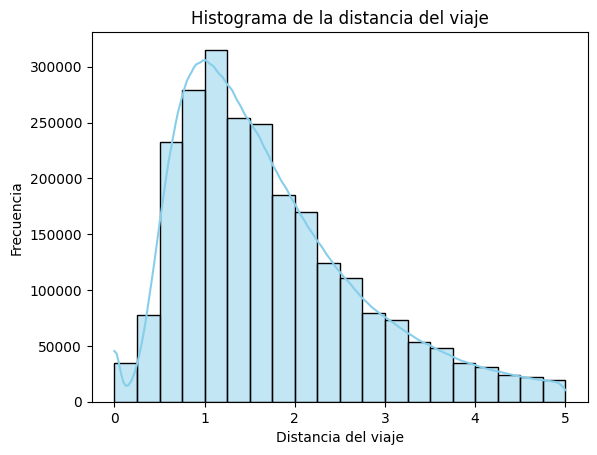

In [29]:
sns.histplot(yellow22_manh['trip_distance'], bins=20, kde=True, color='skyblue')
plt.xlabel('Distancia del viaje')
plt.ylabel('Frecuencia')
plt.title('Histograma de la distancia del viaje')
plt.show()

La gran mayoría de los viajes tienen una distancia entre los 0.5 y 2.5 millas.

In [31]:
yellow22_manh.isna().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          54035
trip_distance                0
RatecodeID               54035
store_and_fwd_flag       54035
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     54035
airport_fee              54035
diferencia_tiempo            0
hora                         0
dia_semana                   0
dtype: int64

Visualizamos los valores nulos.

In [32]:
yellow22_manh["passenger_count"].mode()

0    1.0
Name: passenger_count, dtype: float64

In [33]:
yellow22_manh["passenger_count"] = yellow22_manh["passenger_count"][yellow22_manh["passenger_count"].isnull()] = 1

yellow22_manh["store_and_fwd_flag"] = yellow22_manh["store_and_fwd_flag"][yellow22_manh["store_and_fwd_flag"].isnull()] = 1

yellow22_manh.drop("store_and_fwd_flag", axis=1, inplace=True)

yellow22_manh["RatecodeID"] = yellow22_manh["RatecodeID"][yellow22_manh["RatecodeID"].isnull()] = 1

yellow22_manh["airport_fee"] = yellow22_manh["airport_fee"][yellow22_manh["airport_fee"].isnull()] = 0

yellow22_manh["congestion_surcharge"] = yellow22_manh["congestion_surcharge"][yellow22_manh["congestion_surcharge"].isnull()] = 0

/var/folders/vk/hsfysc513dd4j0c513j6pl3r0000gn/T/ipykernel_93726/1818308217.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yellow22_manh["passenger_count"] = yellow22_manh["passenger_count"][yellow22_manh["passenger_count"].isnull()] = 1
/var/folders/vk/hsfysc513dd4j0c513j6pl3r0000gn/T/ipykernel_93726/1818308217.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yellow22_manh["passenger_count"] = yellow22_manh["passenger_count"][yellow22_manh["passenger_count"].isnull()] = 1
/var/folders/vk/hsfysc513dd4j0c513j6pl3r0000gn/T/ipykernel_93726/1818308217.py:3: S

Imputamos cada valor por su equivalente según el diccionario de datos para evitar mantener el nulo.

In [34]:
yellow22_manh.isna().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
diferencia_tiempo        0
hora                     0
dia_semana               0
dtype: int64